In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# Machine Learning Metrics

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1JFVzhlCoC88uXlivxDy2eFyvQtfDqIzf?usp=sharing)

In [26]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [27]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize and train classifier
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [29]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [30]:
# Probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

#### Precision
Precision measures the accuracy of positive predictions. It is the ratio of true positives to the sum of true and false positives and indicates the proportion of positive identifications that were actually correct.

Precision is particularly important in situations where the cost of a false positive is **high**. For instance, in email spam detection, a high precision might be required to prevent important emails from being classified as spam. You typically aim to maximize precision when false positives carry greater consequences than false negatives.

$$\text{Precision} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$$

In [31]:
precision = precision_score(y_test, y_pred)

In [32]:
precision

0.9459459459459459

#### Recall (Also known as Sensitivity in Binary Classification)
Recall measures the ability of a model to find all the relevant cases (true positives) within a dataset. It is the ratio of true positives to the sum of true positives and false negatives.

Recall is critical in contexts where missing a positive instance is significantly detrimental (ie: healthcare). For example, failing to detect a disease could be fatal. In these cases, a high recall is favored even if it results in more false positives, and efforts are made to minimize the number of false negatives.

$$\text{Recall} = \frac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$$

In [33]:
recall = recall_score(y_test, y_pred)

In [34]:
recall

0.9859154929577465

#### F1 Score
The F1 score is the **harmonic mean** of precision and recall, providing a single score that balances both metrics. It is know as a class balanced metric.

F1  is helpful when there's a need to balance precision and recall. This is particularly valuable in scenarios where **both** false positives and false negatives are costly, and neither metric can be prioritized.

$$ F1 = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}$$


In [35]:
f1 = f1_score(y_test, y_pred)

In [36]:
f1

0.9655172413793104

#### Confusion Matrix
A confusion matrix is a table used to describe the performance of a classification model on an out of sample (test) dataset for which the true values are known. It breaks down predictions into four parts: true positives, true negatives, false positives, and false negatives.

In [37]:
cm = confusion_matrix(y_test, y_pred)

In [38]:
cm

array([[39,  4],
       [ 1, 70]])

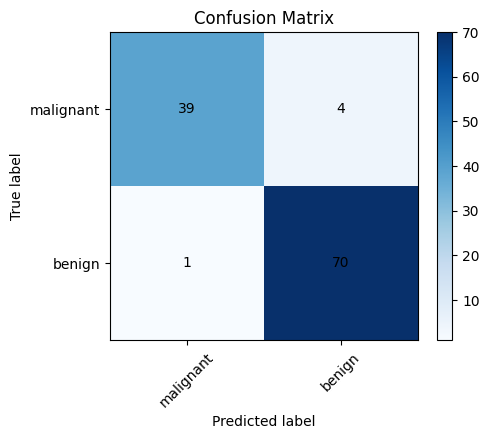

In [39]:
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, data.target_names, rotation=45)
plt.yticks(tick_marks, data.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.grid(False)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

#### ROC Curve and AUC Score
The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied, plotting the True Positive Rate (Recall) against the False Positive Rate.

The Area Under the Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1).


$$ FPR = \frac{\text{False Positive}}{\text{False Positive} + \text{True Negative}}$$


$$TPR = \text{Recall}$$

The roc_curve() function from sklearn.metrics calculates the false positive rate (fpr), true positive rate (tpr), and thresholds for various decision boundaries. These are used to plot the ROC curve.

In [40]:
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

The ROC curve is plotted with false positive rate on the x-axis and true positive rate on the y-axis. The diagonal line ([0, 1], [0, 1]) represents a no-skill classifier; a good classifier stays as far away from this line as possible towards the top-left corner.

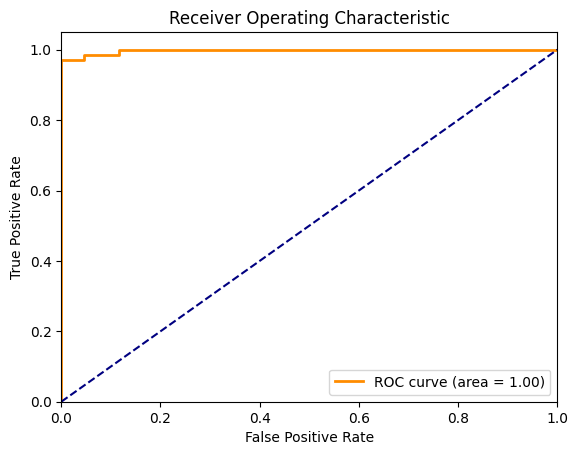

In [41]:
# Plotting ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The auc() function computes the area under the ROC curve, providing a single scalar value to summarize the performance of the classifier across all threshold settings. A higher AUC value indicates a better performing model, generally implying that the classifier is capable of distinguishing between the two classes effectively.

In [42]:
print(f"AUC Score: {roc_auc:.2f}")

AUC Score: 1.00


#### Final Comparison

In [43]:
print(f"Precision: {precision:.2f}")
print(f"Recall/Sensitivity: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC Score: {roc_auc:.2f}")

Precision: 0.95
Recall/Sensitivity: 0.99
F1 Score: 0.97
AUC Score: 1.00
